In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import os
import glob
import cv2

In [2]:
def ReadFloat(filename):
    with open(filename, 'r') as f:
        data = f.read()
        depth = np.frombuffer(data, np.float32).reshape(256,512)
        return depth

(1024, 2048, 3)


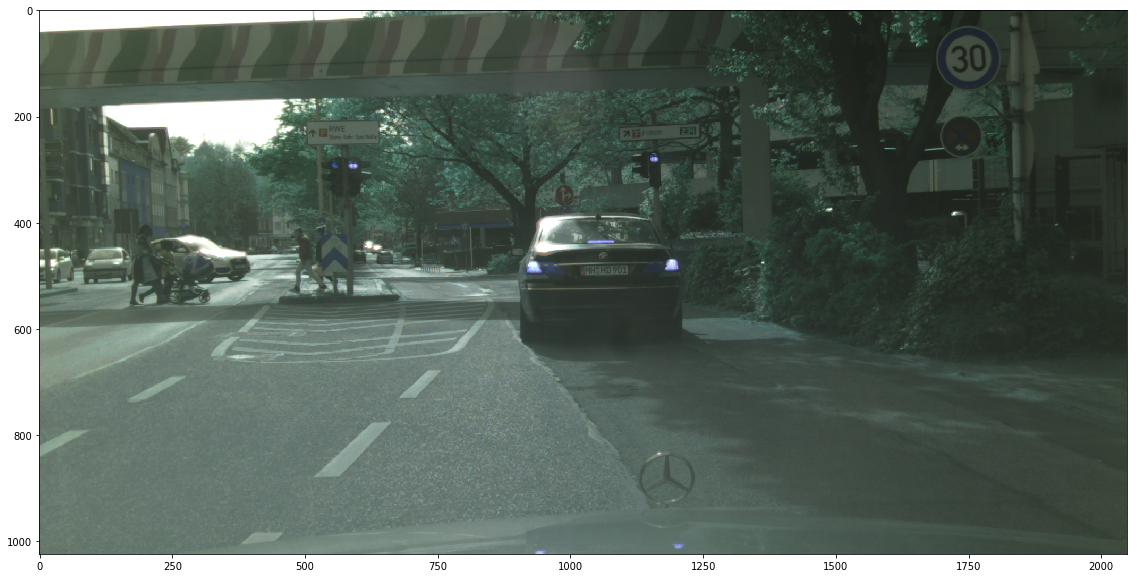

In [3]:
filepattern = '/opt/data/leftImg8bit/train_extra/muhlheim-ruhr/muhlheim-ruhr_000000_000709_leftImg8bit'
img = cv2.imread(filepattern + '.png')
f1 = plt.imshow(img)
print img.shape
#print np.unique(img)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20,10)
plt.show()

(256, 512)
0.000794352
0.0410592


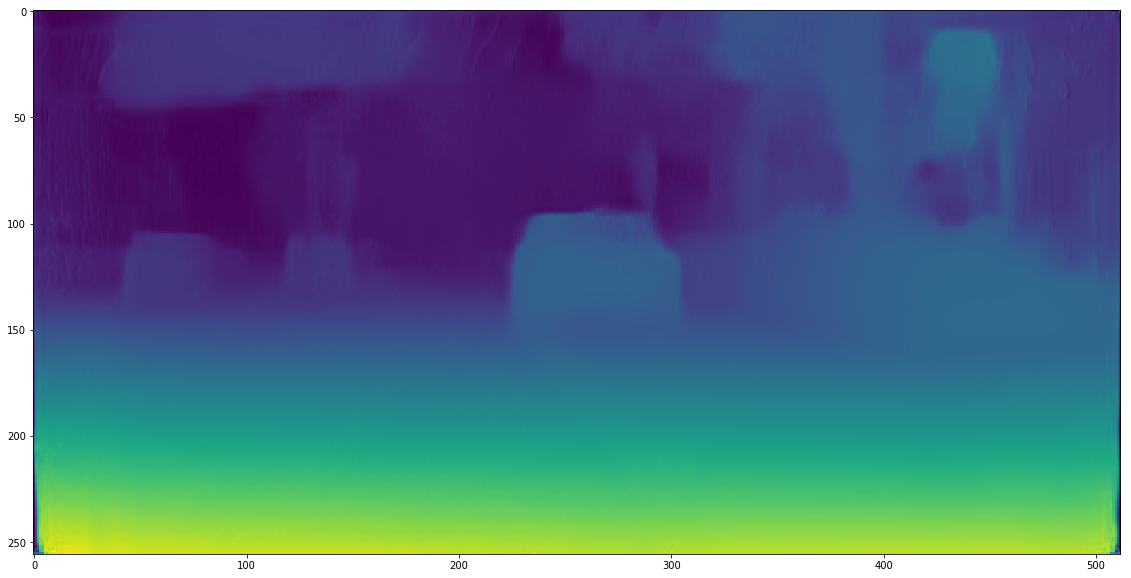

In [37]:
disp = ReadFloat(filepattern + '.flt')
f1 = plt.imshow(disp)
print disp.shape
#print np.unique(img)
print np.min(disp)
print np.max(disp)
#print np.unique(disp)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20,10)
plt.show()

0.0410592
0.000794352
595514.0
11521.1


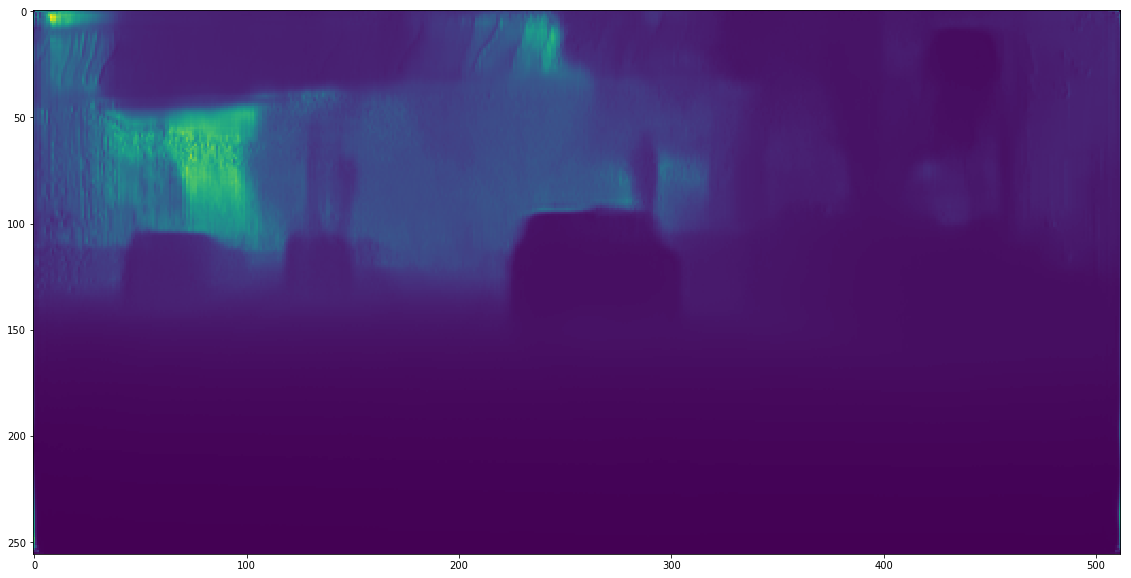

In [38]:
print np.max(disp)
print np.min(disp)
#depth = disp.copy()
#depth[depth == 0] = 1
depth = 2260 * 0.209313 / disp
#print np.unique(depth)
print np.max(depth)
print np.min(depth)
f1 = plt.imshow(depth)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20,10)
plt.show()

(1024, 2048, 3)
[0]


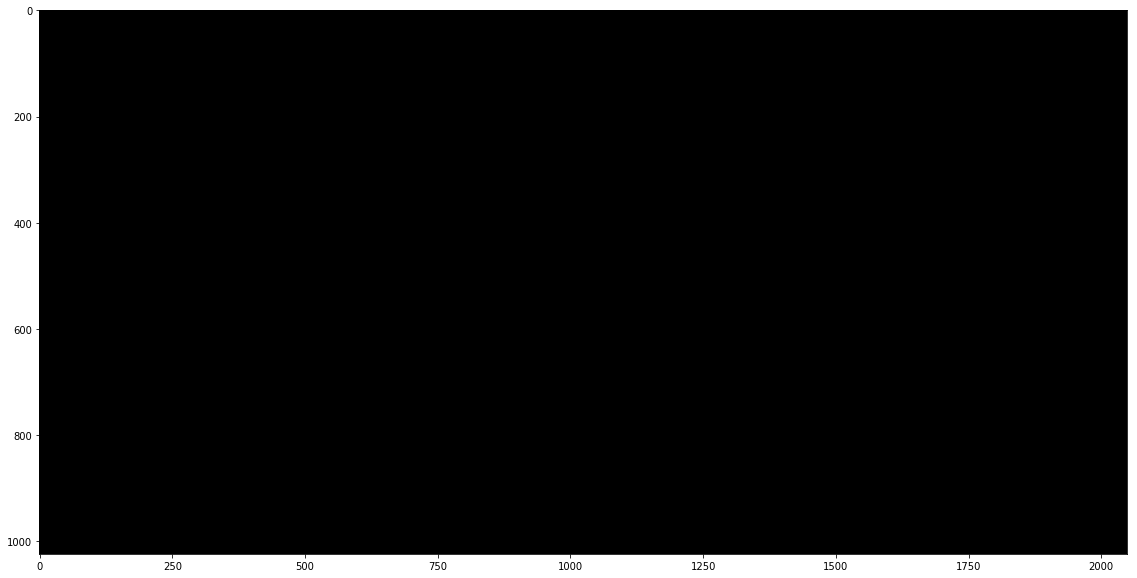

In [39]:
instance = cv2.imread(filepattern + '.inst.png')
f1 = plt.imshow(instance.astype(float))
print instance.shape
print np.unique(instance)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20,10)
plt.show()

[ 0.00079435  0.00084435  0.00084635 ...,  0.04033085  0.04092515
  0.0410592 ]


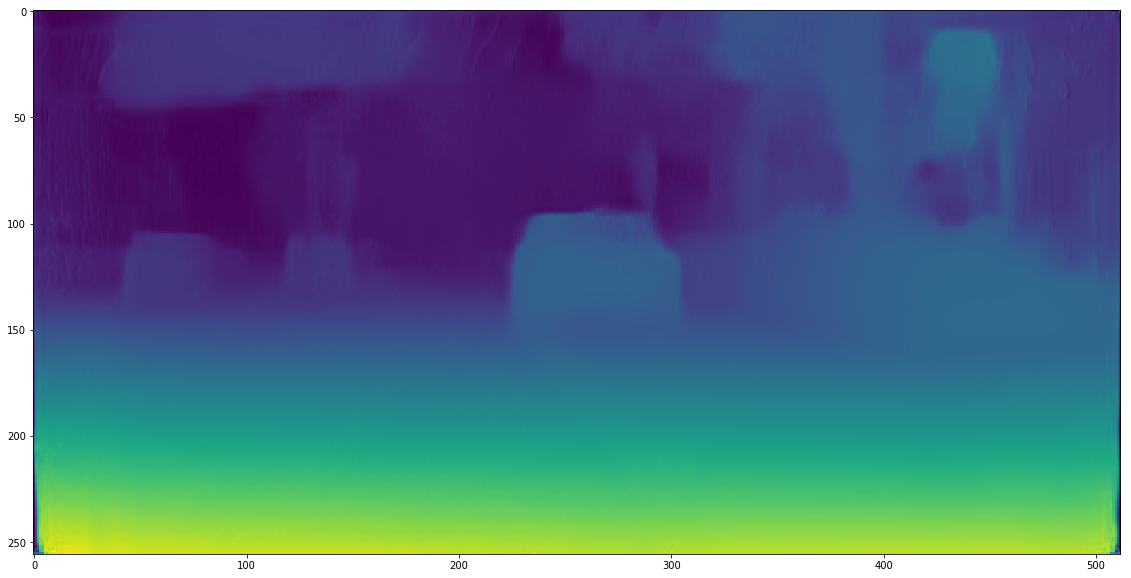

In [44]:
fs = cv2.FileStorage('./build/test_out.yml', cv2.FILE_STORAGE_READ)
disp2 = fs.getNode('disp')
disp2 = disp2.mat()
f1 = plt.imshow(disp2)
print np.unique(disp2)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20,10)
plt.show()

[  11605.31835938   11608.32617188   11609.73144531 ...,  576279.625
  585399.3125      585788.5625    ]


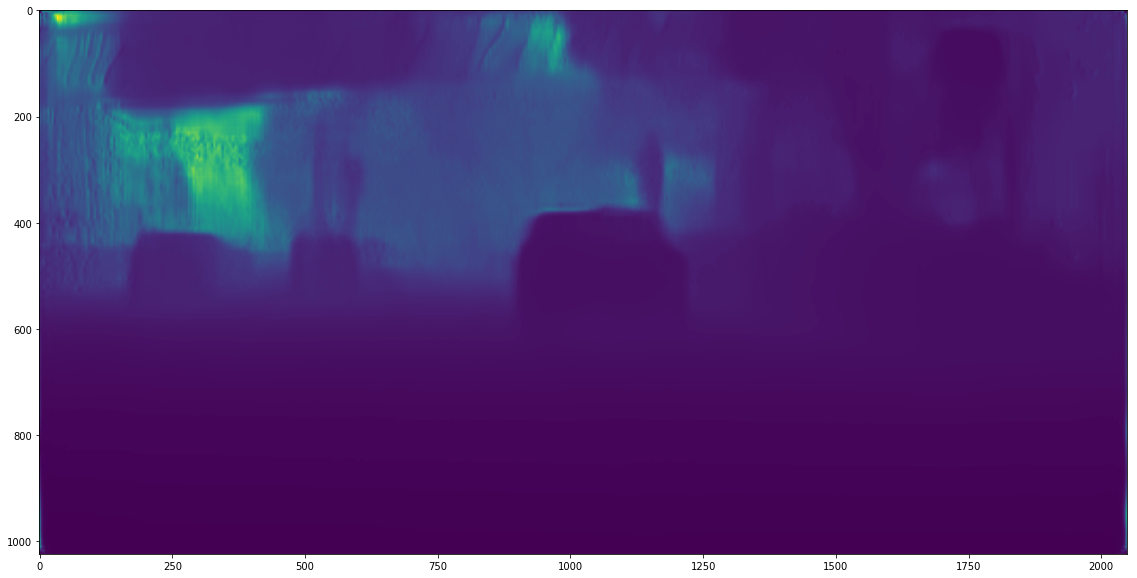

In [45]:
depth2 = fs.getNode('depth')
depth2 = depth2.mat()
f1 = plt.imshow(depth2.astype(float))
print np.unique(depth2)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20,10)
plt.show()

(980051, 1)
(2048, 1024)
(2097152,)


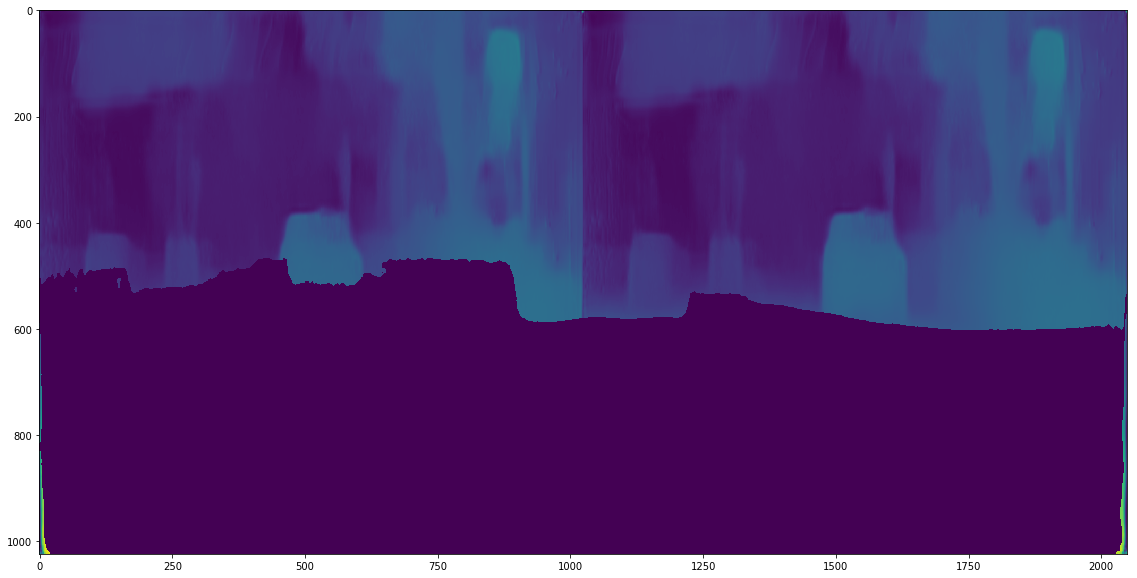

In [46]:
inliers = fs.getNode('inliers')
inliers = inliers.mat()
print inliers.shape
img_trim = disp
img_trim = cv2.resize(img_trim, (1024,2048))
print img_trim.shape
img_trim = img_trim.reshape((1024*2048))
print img_trim.shape
img_trim[inliers] = 0
img_trim = img_trim.reshape((1024,2048))
f1 = plt.imshow(img_trim)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20,10)
plt.show()

In [47]:
print inliers

[[ 954829]
 [ 954830]
 [ 956837]
 ..., 
 [2097128]
 [2097129]
 [2097130]]


[ 30 111 152 163 164 165 182 197 223]


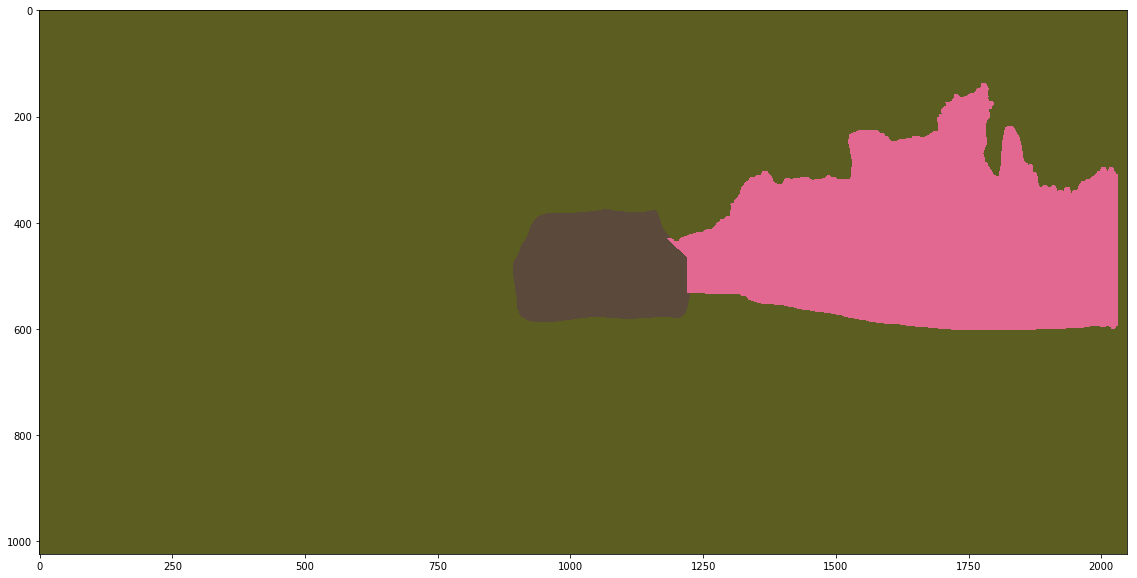

In [48]:
segments = fs.getNode('segments')
segments = segments.mat()
f1 = plt.imshow(segments.astype(float))
print np.unique(segments)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20,10)
plt.show()